In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
datapath="https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir=keras.utils.get_file("flower_photos", origin=datapath, cache_dir="/content/drive/MyDrive/AI&DS Dataset/datasets/flower_photos" ,untar=True )

228813984/228813984 [==============================] - 1s 0us/step


In [ ]:
data_dir

'/tmp/.keras/datasets/flower_photos'

In [ ]:
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('/tmp/.keras/datasets/flower_photos')

In [ ]:
data=list(data_dir.glob("*/*.jpg"))
data

[PosixPath('/tmp/.keras/datasets/flower_photos/daisy/9054268881_19792c5203_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/169371301_d9b91a2a42.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/3474942718_c418dae6f1.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/5435513198_90ce39f1aa_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/433037739_6a030e5912.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/2641979584_2b21c3fe29_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/2646438199_b309cffd65_n.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/4511693548_20f9bd2b9c_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/4141147800_813f660b47.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/5795159787_ebb51a5e75.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/3695826945_9f374e8a00_m.jpg'),
 PosixPath('/tmp/.keras/datasets/flower_photos/daisy/2828733818_1c1ed0089d_n.jpg'),
 Pos

In [ ]:
data_count=len(list(data_dir.glob("*/*.jpg")))
data_count

3670

In [ ]:
tulips=list(data_dir.glob("tulips/*.jpg"))
str(tulips[0])

'/tmp/.keras/datasets/flower_photos/tulips/2436998042_4906ea07af.jpg'

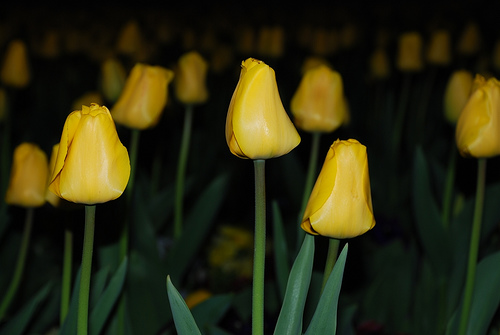

In [ ]:
img=cv2.imread(str(tulips[0]),1)
cv2_imshow(img)

In [ ]:
img=cv2.imread

In [ ]:
flower_data={"tulips":list(data_dir.glob("tulips/*.jpg")),
             "sunflowers":list(data_dir.glob("sunflowers/*.jpg")),
             "daisy":list(data_dir.glob("daisy/*.jpg")),
             "dandelion":list(data_dir.glob("dandelion/*.jpg")),
             "roses":list(data_dir.glob("roses/*.jpg")),
             }

In [ ]:
flower_label={ "tulips":0,
               "sunflowers":1,
               "daisy":2,
               "dandelion":3,
               "roses":4,
               }

In [ ]:
X=[]
y=[]

for flower, images in flower_data.items():
  print(flower)
  print(len(images))
  for i in images:
    img=cv2.imread(str(i),1)
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flower_label[flower])

tulips
799
sunflowers
699
daisy
633
dandelion
898
roses
641


In [ ]:
X=np.array(X)
y=np.array(y)
X.shape,y.shape

((3670, 180, 180, 3), (3670,))

In [ ]:
X_train, X_test,y_train, y_test=train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((2936, 180, 180, 3), (734, 180, 180, 3), (2936,), (734,))

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
model=keras.Sequential([
                        #CNN
                        keras.layers.Conv2D(100,(2,2), strides=(1,1), input_shape=(180,180,3),activation='relu'),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(100, (2,2), strides=(1,1) ,activation='relu'),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(100, (2,2), strides=(1,1),activation='relu'),
                        keras.layers.MaxPooling2D(2,2),

                        #ANN

                        keras.layers.Flatten(),
                        keras.layers.Dense(100 , activation='relu'),
                        keras.layers.Dense(5, activation='softmax')
                        ])
model.compile( optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics= "accuracy" )
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
92/92 [==============================] - 13s 74ms/step - loss: 1.3266 - accuracy: 0.4234
Epoch 2/10
92/92 [==============================] - 6s 61ms/step - loss: 0.9644 - accuracy: 0.6250
Epoch 3/10
92/92 [==============================] - 6s 60ms/step - loss: 0.7645 - accuracy: 0.7050
Epoch 4/10
92/92 [==============================] - 6s 62ms/step - loss: 0.5467 - accuracy: 0.8007
Epoch 5/10
92/92 [==============================] - 6s 62ms/step - loss: 0.3393 - accuracy: 0.8798
Epoch 6/10
92/92 [==============================] - 6s 62ms/step - loss: 0.1765 - accuracy: 0.9404
Epoch 7/10
92/92 [==============================] - 6s 61ms/step - loss: 0.1032 - accuracy: 0.9707
Epoch 8/10
92/92 [==============================] - 6s 61ms/step - loss: 0.0833 - accuracy: 0.9789
Epoch 9/10
92/92 [==============================] - 6s 65ms/step - loss: 0.0809 - accuracy: 0.9782
Epoch 10/10
92/92 [==============================] - 6s 61ms/step - loss: 0.0500 - accuracy: 0.9867


In [ ]:
model.evaluate(X_test,y_test)

23/23 [==============================] - 1s 40ms/step - loss: 1.8007 - accuracy: 0.6962


[1.8007209300994873, 0.696185290813446]

In [ ]:
Data_augmentation=keras.Sequential([keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
                                    keras.layers.experimental.preprocessing.RandomRotation(0.2),
                                    keras.layers.experimental.preprocessing.RandomZoom(0.4)
                                    ])

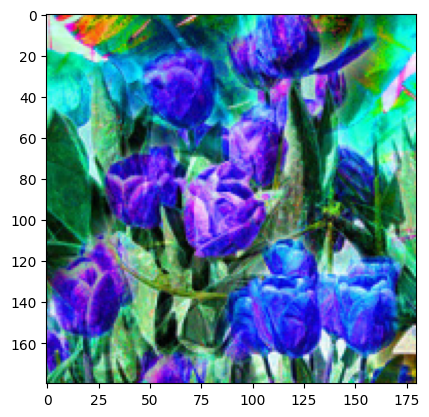

In [ ]:
plt.imshow(X[2])

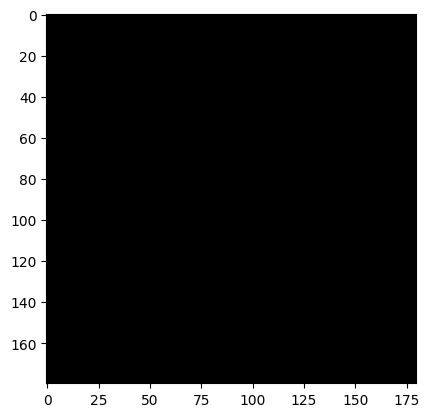

In [ ]:
plt.imshow(Data_augmentation(X_train)[2].numpy().astype("uint8"))

In [ ]:
model_aug=keras.Sequential([
                        Data_augmentation,
                        #CNN
                        keras.layers.Conv2D(100,(2,2), strides=(1,1), input_shape=(180,180,3),activation='relu'),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(100, (2,2), strides=(1,1) ,activation='relu'),
                        keras.layers.MaxPooling2D(2,2),
                        keras.layers.Conv2D(100, (2,2), strides=(1,1),activation='relu'),
                        keras.layers.MaxPooling2D(2,2),

                        #ANN

                        keras.layers.Flatten(),
                        keras.layers.Dense(100 , activation='relu'),
                        keras.layers.Dense(5, activation='softmax')
                        ])
model_aug.compile( optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics= "accuracy" )
model_aug.fit(X_train,y_train,epochs=10)

Epoch 1/10
92/92 [==============================] - 8s 64ms/step - loss: 1.3094 - accuracy: 0.4206
Epoch 2/10
92/92 [==============================] - 6s 63ms/step - loss: 1.1132 - accuracy: 0.5412
Epoch 3/10
92/92 [==============================] - 6s 63ms/step - loss: 1.0067 - accuracy: 0.5988
Epoch 4/10
92/92 [==============================] - 6s 64ms/step - loss: 0.9420 - accuracy: 0.6253
Epoch 5/10
92/92 [==============================] - 6s 63ms/step - loss: 0.8801 - accuracy: 0.6570
Epoch 6/10
92/92 [==============================] - 6s 64ms/step - loss: 0.8555 - accuracy: 0.6631
Epoch 7/10
92/92 [==============================] - 6s 63ms/step - loss: 0.8217 - accuracy: 0.6815
Epoch 8/10
92/92 [==============================] - 6s 64ms/step - loss: 0.7977 - accuracy: 0.6836
Epoch 9/10
92/92 [==============================] - 6s 65ms/step - loss: 0.7718 - accuracy: 0.6975
Epoch 10/10
92/92 [==============================] - 6s 65ms/step - loss: 0.7685 - accuracy: 0.6965


In [ ]:
model_aug.evaluate(X_test,y_test)

23/23 [==============================] - 1s 23ms/step - loss: 0.7105 - accuracy: 0.7439


[0.7104568481445312, 0.7438691854476929]